In [43]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [44]:
import cv2
import numpy as np

In [45]:
from pathlib import Path
simple_colour = Path('../GTA_images/Simple/Colour')
simple_depth = Path('../GTA_images/Simple/Depth/')

In [46]:
import sys
sys.path.append('..')

In [47]:
from Functions import import_raw_colour_image, import_raw_depth_image, show_depth_image, show_img

In [48]:
rgb_0 = import_raw_colour_image(sorted(list(simple_colour.iterdir()))[0])
depth_0 = import_raw_depth_image(sorted(list(simple_depth.iterdir()))[0])

In [49]:
rgb_0.shape
depth_0.shape

(720, 1280, 3)

(720, 1280)

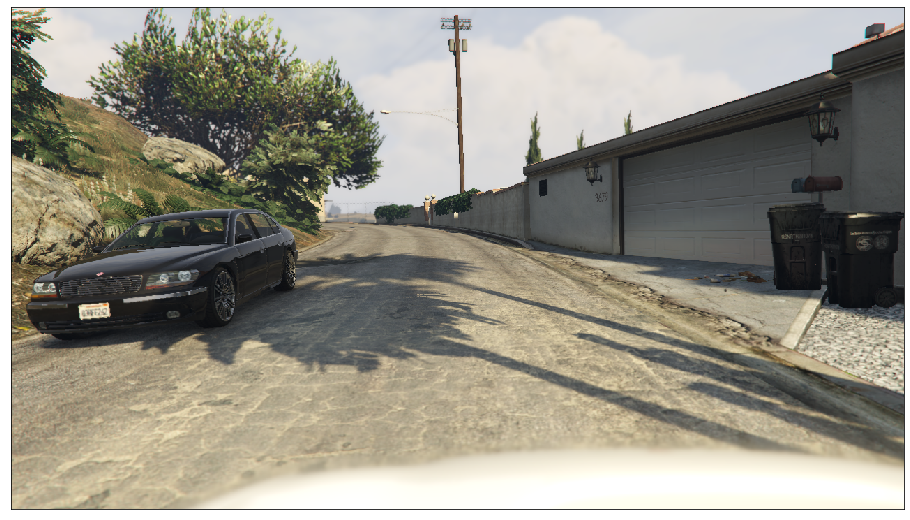

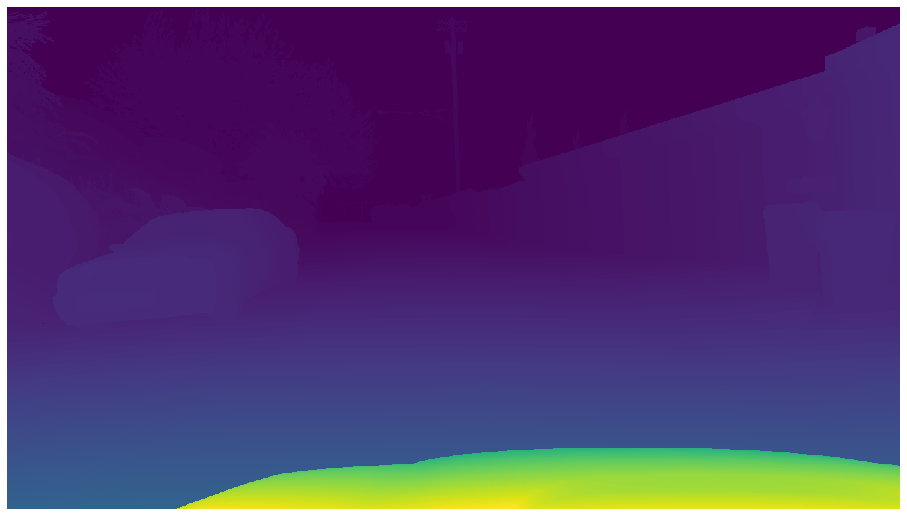

In [50]:
# rgb_0[:,:,::-1]
show_img(rgb_0, figsize=(16,16))
show_depth_image(depth_0, (16,16))

In [69]:
def getCorners(rgb_image, corner_colour):
    rgb_copy = rgb_image.copy()
    grey_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2GRAY)
    corners = cv2.goodFeaturesToTrack(grey_image, 70, 0.01, 5, useHarrisDetector=False)
    for c in corners:
        rgb_copy = cv2.circle(rgb_copy, tuple(c.squeeze()), 5, corner_colour, 10)
    show_img(rgb_copy, figsize=(16,16))

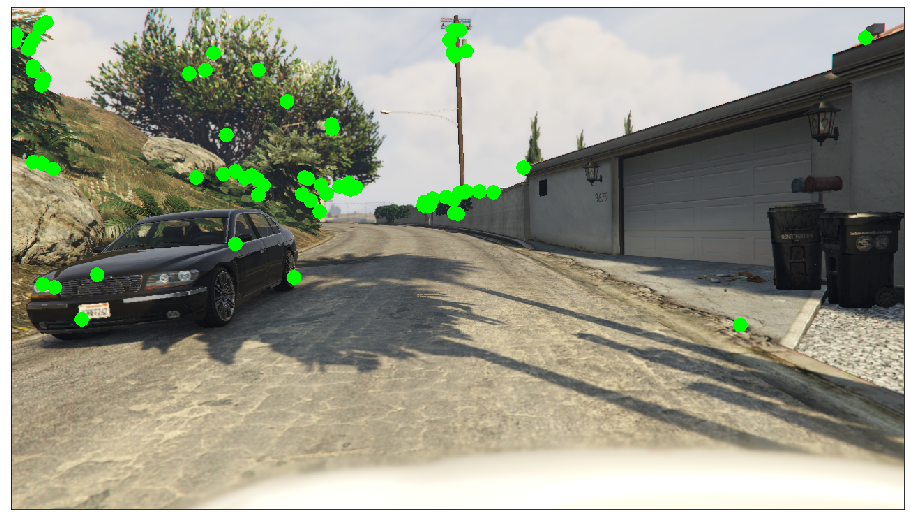

In [71]:
getCorners(rgb_0, (0,255,0))

In [72]:
def corners_at_scales(rgb_image, iterations=2):
    getCorners(rgb_image, (0,255,0))
    rgb_up = rgb_image
    rgb_down = rgb_image
    step = 255/(iterations-1)

    for i in range(1,iterations):
        rgb_up = cv2.pyrUp(rgb_up)
        rgb_down = cv2.pyrDown(rgb_down)
        getCorners(rgb_up, (i*step, 255-(i*step), 0))
        getCorners(rgb_down, (0, 255-(i*step), i*step))

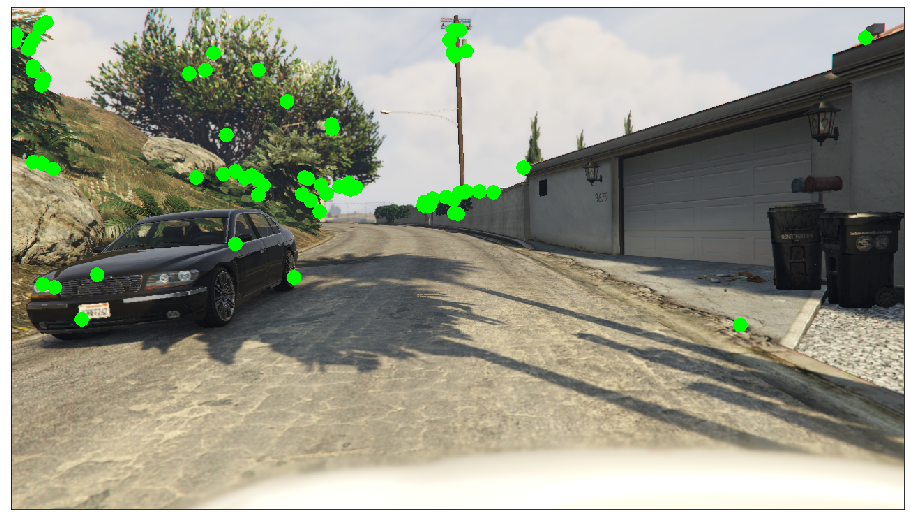

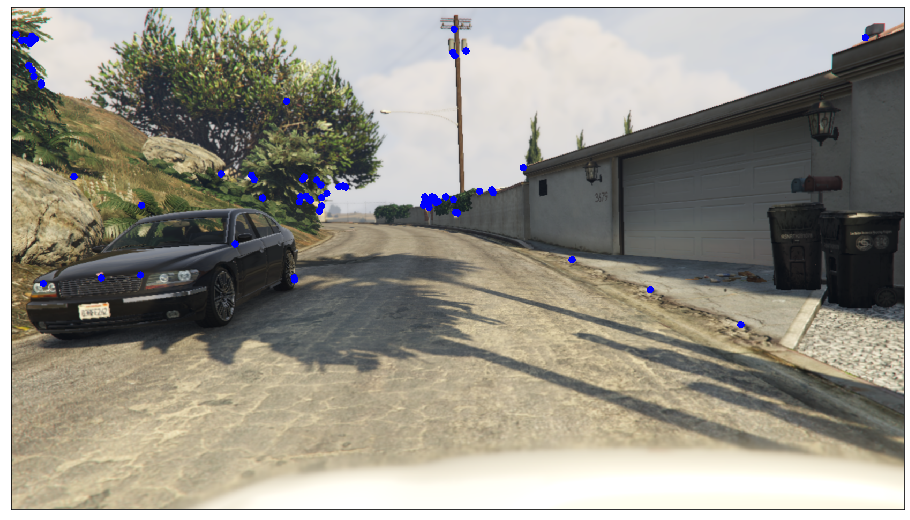

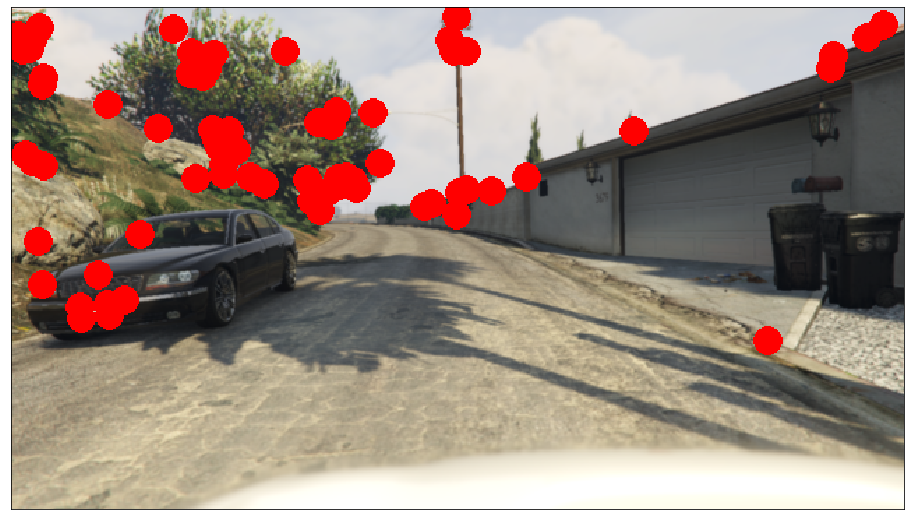

In [73]:
corners_at_scales(rgb_0)